<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/TASK3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression with Gradient Descent

The following link https://drive.google.com/file/d/1ziWF38RKYvs4ysqwcuPRzC7N1WiX3hk7/view?usp=sharing contains correlated data containing three independent and one dependent variables. Use this dataset to implement a logistic regression of multiple variables with gradient descent. Ensure each step of the process is properly documented using a text block in your notebook just before the code block. Implement in a Jupyter Notebook and submit the link below.

Additional Requirements:

    Print out the binary cross-entropy loss after each cycle of training.

    Plot a graph of the cost function as training progresses.

    Print out the final values of m1, m2 , m3 and c after training is complete

    Plot a scatter graph of Y against Y_hat (or P) to visualize how well the model performed



NB: Ensure to grant comment access to all for your document to allow grading comments. You will get a zero score if you don't grant access to your document.




Import the required libraries: numpy, pandas, matplitlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We load the dataset that is stored in the google drive .. load it directly using the url providexs

In [3]:
url = "https://drive.google.com/uc?id=1ziWF38RKYvs4ysqwcuPRzC7N1WiX3hk7"

df = pd.read_csv(url)
df

,x1,x2,x3,label
0,-0.332727,-0.696181,-0.286767,0
1,-1.510220,-1.375861,-1.197257,0
2,-1.256076,-1.228764,-1.785996,0
3,-0.772276,-0.409598,-0.267973,0
4,-1.346263,0.112805,0.612268,0
...,...,...,...,...
195,-0.603475,-0.006417,-0.057825,0
196,-1.037773,-0.904611,-0.256521,0
197,0.686458,0.394530,0.191661,1
198,-1.183910,-0.943287,-0.645391,0


we can see that the data has 200 rows and a total of 4 columns .. thus the independent variable is x1, x2, x3 while the dependent variable is label column

we etract the features x1,x2,x3 to a matrix "X" and labels to a vector "Y"  an we initialize the initial parameters  (weights m1, m2, m3 and bias c)

In [11]:
X = df[["x1", "x2", "x3"]].values
Y = df["label"].values.reshape(-1, 1)

m, n = X.shape
weights = np.zeros((n, 1))  #m1,m2,m3
bias = 0  #c

define the sigmoid and the cost function --- sigmoid will convert linear prediction to probability of 0 and 1  --- to measure the cost function, we will use the negative log likelyhood / binary cross entropy

In [12]:
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

def compute_cost (Y, Y_pred):
    epsilon = 1e-10 # Small value to prevent log(0)
    Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon) # Clip values to avoid log(0) or log(1)
    cost = -(1/m) * np.sum(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
    return cost

  Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)

It ensures that the predicted probabilities (Y_pred) are never exactly 0 or 1. If Y_pred were 0, np.log(Y_pred) would be -infinity, causing errors. Similarly, if Y_pred were 1, then np.log(1 - Y_pred) (which would be np.log(0)) would also cause an error. By clipping Y_pred to be between epsilon (a very small number like 1e-10) and 1 - epsilon, we prevent the numerical instabilities and ensure the log function can be computed without errors.

Gradient descent algorithm : we will update the weights m1,m2,m3; bias c and the cost function using the deriative of the cost function.
we will aslo store and print the loss after each epoch

In [26]:
lr = 0.01
epochs = 10000000
cost_history = []

for epoch in range(epochs):

    # pass the sigmoid to the predictions
    z = np.dot(X, weights) + bias
    Y_pred = sigmoid (z)

    # compute the cost
    cost = compute_cost (Y, Y_pred)
    cost_history.append(cost)

    # printing the loss
    if (epoch + 1) % 10000 == 0: # Print loss every 10000 epochs for readability
        print (f"Epoch {epoch+1}, Loss: {cost:.4f}")

    # compute the  gradients
    dz = Y_pred - Y
    dw = (1/m) * np.dot (X.T, dz)
    db = (1/m) * np.sum(dz)

    # update the parameters
    weights -= lr * dw
    bias  -= lr * db

Epoch 10000, Loss: 0.0169
Epoch 20000, Loss: 0.0168
Epoch 30000, Loss: 0.0168
Epoch 40000, Loss: 0.0168
Epoch 50000, Loss: 0.0168
Epoch 60000, Loss: 0.0168
Epoch 70000, Loss: 0.0168
Epoch 80000, Loss: 0.0168
Epoch 90000, Loss: 0.0168
Epoch 100000, Loss: 0.0168
Epoch 110000, Loss: 0.0168
Epoch 120000, Loss: 0.0168
Epoch 130000, Loss: 0.0168
Epoch 140000, Loss: 0.0168
Epoch 150000, Loss: 0.0168
Epoch 160000, Loss: 0.0168
Epoch 170000, Loss: 0.0168
Epoch 180000, Loss: 0.0168
Epoch 190000, Loss: 0.0167
Epoch 200000, Loss: 0.0167
Epoch 210000, Loss: 0.0167
Epoch 220000, Loss: 0.0167
Epoch 230000, Loss: 0.0167
Epoch 240000, Loss: 0.0167
Epoch 250000, Loss: 0.0167
Epoch 260000, Loss: 0.0167
Epoch 270000, Loss: 0.0167
Epoch 280000, Loss: 0.0167
Epoch 290000, Loss: 0.0167
Epoch 300000, Loss: 0.0167
Epoch 310000, Loss: 0.0167
Epoch 320000, Loss: 0.0167
Epoch 330000, Loss: 0.0167
Epoch 340000, Loss: 0.0167
Epoch 350000, Loss: 0.0166
Epoch 360000, Loss: 0.0166
Epoch 370000, Loss: 0.0166
Epoch 3800

Printing the final values after training

In [27]:
print("\nFinal learned parameters")
print("m1:", weights[0][0])
print("m2:", weights[1][0])
print("m3:", weights[2][0])
print("c:", bias)


Final learned parameters
m1: 64.44284271100004
m2: -46.53234398607066
m3: 30.857018717390652
c: -8.139083631181633


plotting the cost function over the training

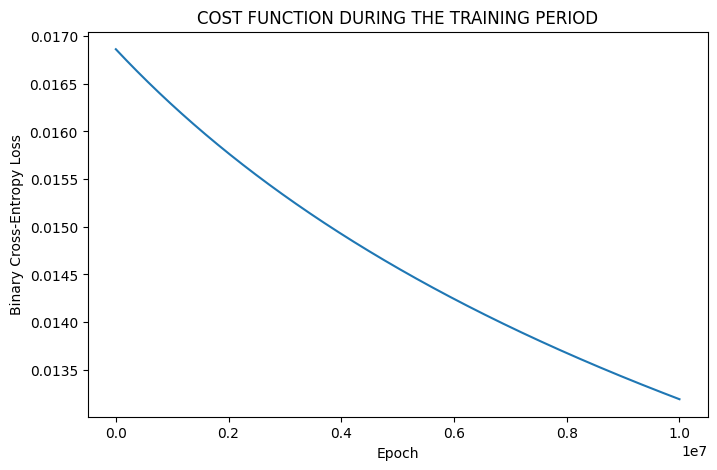

In [28]:
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("COST FUNCTION DURING THE TRAINING PERIOD")
plt.show()

Scatter plot of Y vs Y_pred -- they should cluster at points 0 and 1

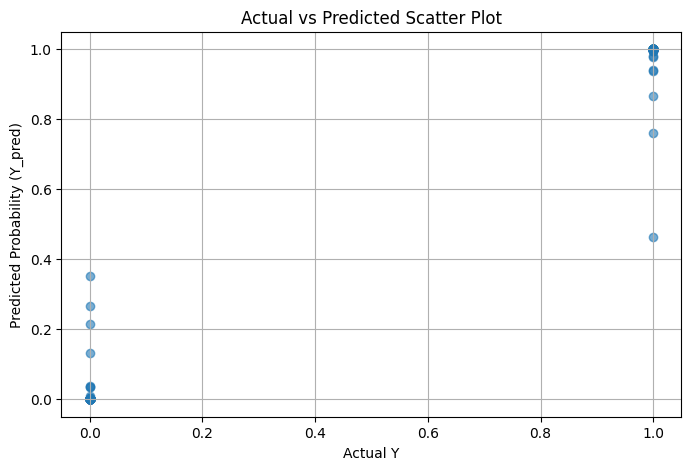

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(Y, Y_pred, alpha=0.6)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Probability (Y_pred)")
plt.title("Actual vs Predicted Scatter Plot")
plt.grid(True)
plt.show()